In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [5]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [6]:
asset = 'ADA' 
freq = '1sec'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('1s')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading ADA from ../dataset/ADA_1sec.csv
ADA: 1030533 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:33:00+00:00,2021-04-07 11:33:00.055697+00:00,1.170750,0.001500,0.000000,0.000000,-0.000641,-0.000726,-0.000811,-0.000897,-0.001068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:33:01+00:00,2021-04-07 11:33:01.055697+00:00,1.170050,0.000100,684.618694,74178.000000,-0.000043,-0.000128,-0.000214,-0.000470,-0.000641,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:33:02+00:00,2021-04-07 11:33:02.055697+00:00,1.170450,0.000900,1280.056786,1835.730000,-0.000384,-0.000470,-0.000555,-0.000641,-0.000812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [7]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [8]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 75102461 total (47.018%)


But there are a lot of Zero values

In [9]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 1187201 total (1.772%)


sells              748712
buys               437958
asks_notional_0       334
bids_notional_0       197
system_time             0
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [10]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 30286259 total (97.963%)


bids_market_notional_13    1030525
asks_market_notional_14    1030524
bids_market_notional_14    1030524
bids_market_notional_12    1030522
asks_market_notional_13    1030522
bids_market_notional_11    1030512
asks_market_notional_12    1030510
bids_market_notional_10    1030505
asks_market_notional_11    1030502
asks_market_notional_10    1030482
bids_market_notional_9     1030480
bids_market_notional_8     1030476
asks_market_notional_9     1030460
bids_market_notional_7     1030445
asks_market_notional_8     1030385
bids_market_notional_6     1030382
asks_market_notional_7     1030262
bids_market_notional_5     1030194
asks_market_notional_6     1029940
bids_market_notional_4     1029696
asks_market_notional_5     1029229
bids_market_notional_3     1028589
asks_market_notional_4     1027665
bids_market_notional_2     1024576
asks_market_notional_3     1023183
bids_market_notional_1     1014897
asks_market_notional_2     1010576
asks_market_notional_1      967753
bids_market_notional

In [11]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 24362277 total (78.802%)


asks_cancel_notional_14    965820
asks_cancel_notional_13    954386
asks_cancel_notional_12    939924
asks_cancel_notional_11    921763
asks_cancel_notional_10    898549
asks_cancel_notional_9     875577
bids_cancel_notional_14    866100
asks_cancel_notional_8     853626
bids_cancel_notional_13    840266
bids_cancel_notional_0     840084
asks_cancel_notional_7     835678
asks_cancel_notional_0     821605
asks_cancel_notional_6     817672
bids_cancel_notional_12    814541
asks_cancel_notional_5     799118
bids_cancel_notional_11    791616
bids_cancel_notional_4     779177
bids_cancel_notional_5     777419
asks_cancel_notional_4     777139
bids_cancel_notional_10    772468
bids_cancel_notional_6     768518
bids_cancel_notional_3     766143
bids_cancel_notional_9     758286
bids_cancel_notional_7     757825
bids_cancel_notional_8     752058
asks_cancel_notional_3     746068
bids_cancel_notional_2     732376
bids_cancel_notional_1     725410
asks_cancel_notional_2     708427
asks_cancel_no

In [12]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 19266724 total (62.320%)


asks_limit_notional_14    901883
asks_limit_notional_13    884186
asks_limit_notional_12    863963
asks_limit_notional_11    836968
asks_limit_notional_10    804419
bids_limit_notional_14    766385
asks_limit_notional_9     765753
bids_limit_notional_13    728303
asks_limit_notional_8     726243
asks_limit_notional_7     695051
bids_limit_notional_12    691691
asks_limit_notional_6     670488
bids_limit_notional_11    658605
asks_limit_notional_5     645977
bids_limit_notional_10    629381
asks_limit_notional_4     617261
bids_limit_notional_9     605728
bids_limit_notional_5     590482
bids_limit_notional_8     587782
bids_limit_notional_6     585972
bids_limit_notional_4     583851
bids_limit_notional_7     581661
asks_limit_notional_3     579839
bids_limit_notional_3     552553
asks_limit_notional_2     512889
bids_limit_notional_2     502460
asks_limit_notional_1     450666
bids_limit_notional_1     446203
bids_limit_notional_0     401056
asks_limit_notional_0     399025
dtype: int

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include just a few zero values.

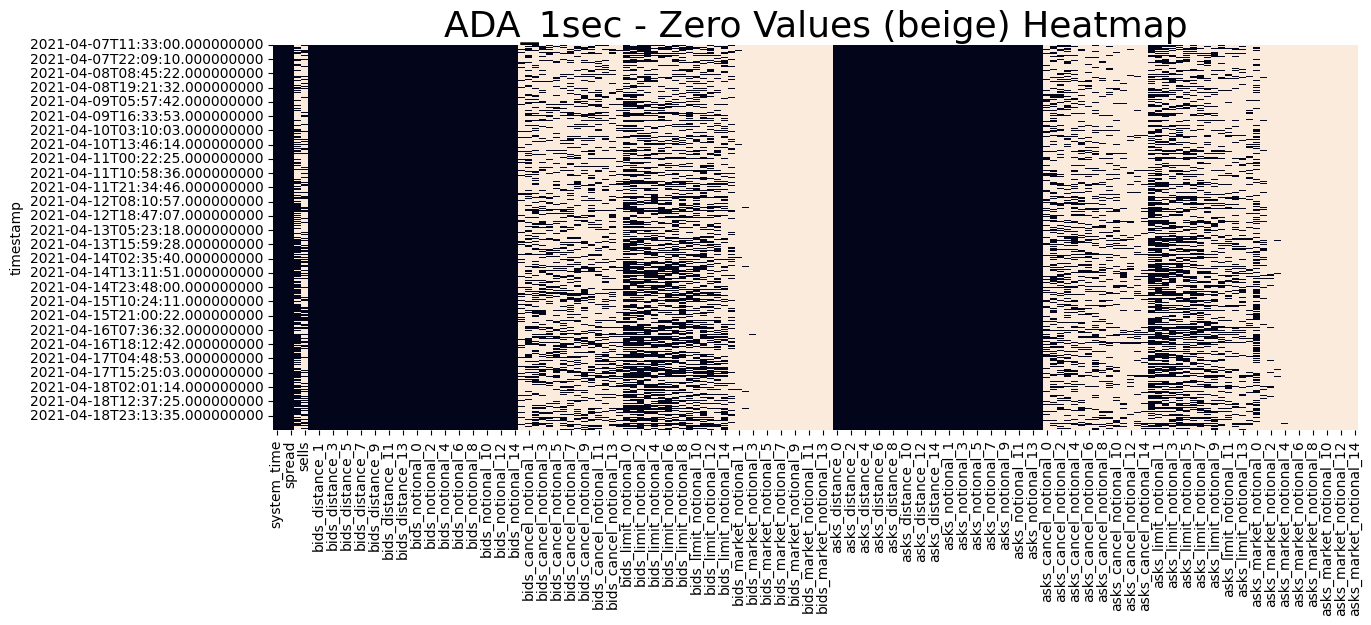

In [13]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

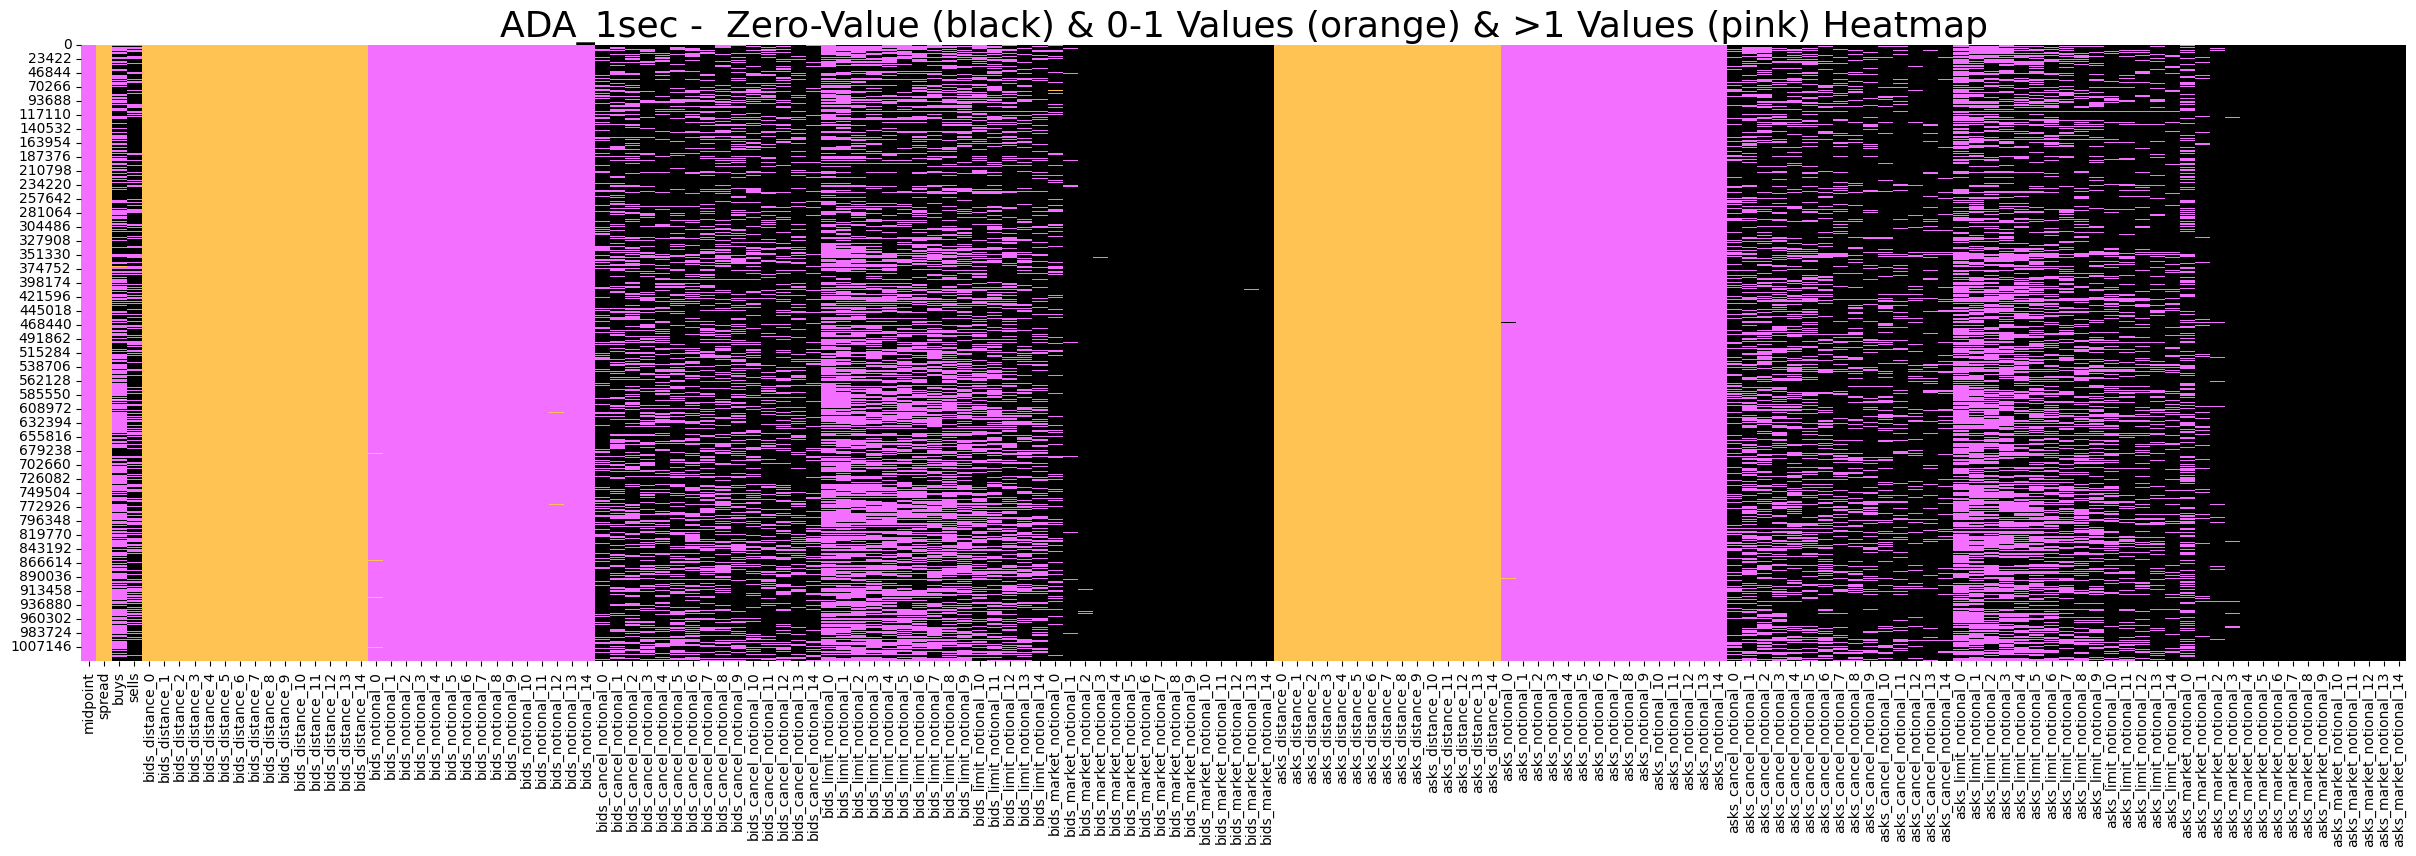

In [14]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [15]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,1030533.000000,1.315095,0.102208,1.130450,1.214800,1.299450,1.416300,1.558650
spread,1030533.000000,0.000671,0.000712,0.000100,0.000400,0.000600,0.000800,0.052700
buys,1030533.000000,759.949027,4003.016934,0.000000,0.000000,18.411547,294.060150,344554.026283
sells,1030533.000000,631.169218,4767.758321,0.000000,0.000000,0.000000,10.210662,386263.500416
bids_distance_0,1030533.000000,-0.000255,0.000278,-0.019825,-0.000304,-0.000210,-0.000140,-0.000032
bids_distance_1,1030533.000000,-0.000398,0.000331,-0.025586,-0.000445,-0.000340,-0.000268,-0.000097
bids_distance_2,1030533.000000,-0.000538,0.000382,-0.028489,-0.000590,-0.000466,-0.000380,-0.000161
bids_distance_3,1030533.000000,-0.000670,0.000421,-0.031536,-0.000738,-0.000598,-0.000496,-0.000227
bids_distance_4,1030533.000000,-0.000800,0.000456,-0.031685,-0.000876,-0.000728,-0.000616,-0.000297
bids_distance_5,1030533.000000,-0.000925,0.000487,-0.032872,-0.000997,-0.000859,-0.000732,-0.000364


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

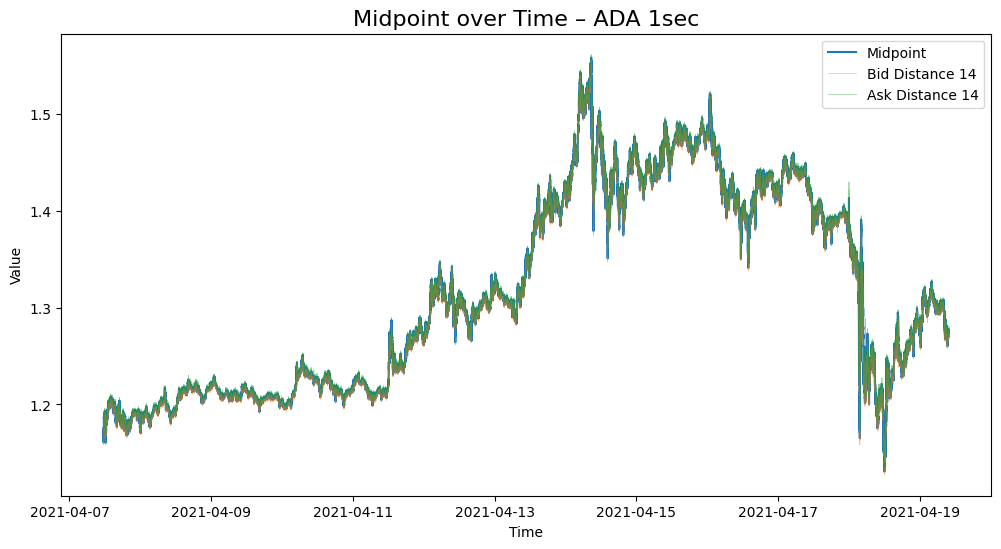

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

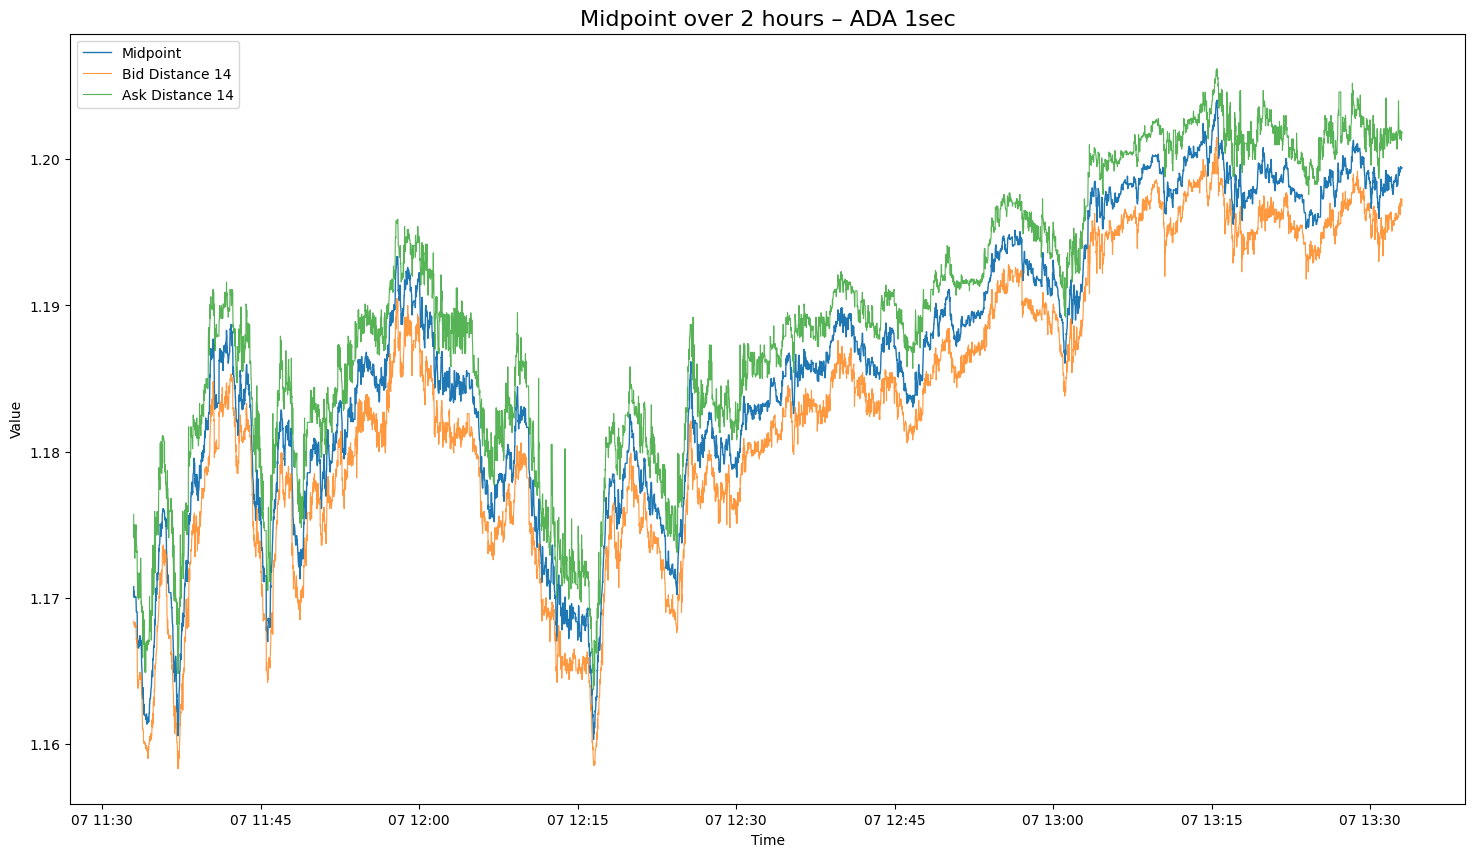

In [17]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [18]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:33:00+00:00,2021-04-07 11:33:01+00:00,2021-04-07 11:33:02+00:00
system_time,2021-04-07 11:33:00.055697+00:00,2021-04-07 11:33:01.055697+00:00,2021-04-07 11:33:02.055697+00:00
midpoint,1.17075,1.17005,1.17045
spread,0.0015,0.0001,0.0009
buys,0.0,684.618694,1280.056786
sells,0.0,74178.0,1835.73
bids_distance_0,-0.000641,-0.000043,-0.000384
bids_distance_1,-0.000726,-0.000128,-0.00047
bids_distance_2,-0.000811,-0.000214,-0.000555
bids_distance_3,-0.000897,-0.00047,-0.000641
bids_distance_4,-0.001068,-0.000641,-0.000812


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [19]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:33:00+00:00,2021-04-07 11:33:01+00:00,2021-04-07 11:33:02+00:00
bids_distance_0,-0.000641,-0.000043,-0.000384
bids_notional_0,177076.125,102898.132812,101062.398438
bids_cancel_notional_0,0.0,0.0,0.0
bids_limit_notional_0,177076.125,0.0,0.0
bids_market_notional_0,0.0,74178.0,1835.72998
asks_distance_0,0.000641,0.000043,0.000384
asks_notional_0,2460.149902,2987.27002,2978.209961
asks_cancel_notional_0,0.0,2457.209961,20381.910156
asks_limit_notional_0,2460.149902,5738.160156,3002.860107
asks_market_notional_0,0.0,293.679993,192.029999


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [20]:
print(f'{asset} {freq} shape:', df.shape)

ADA 1sec shape: (1030533, 155)


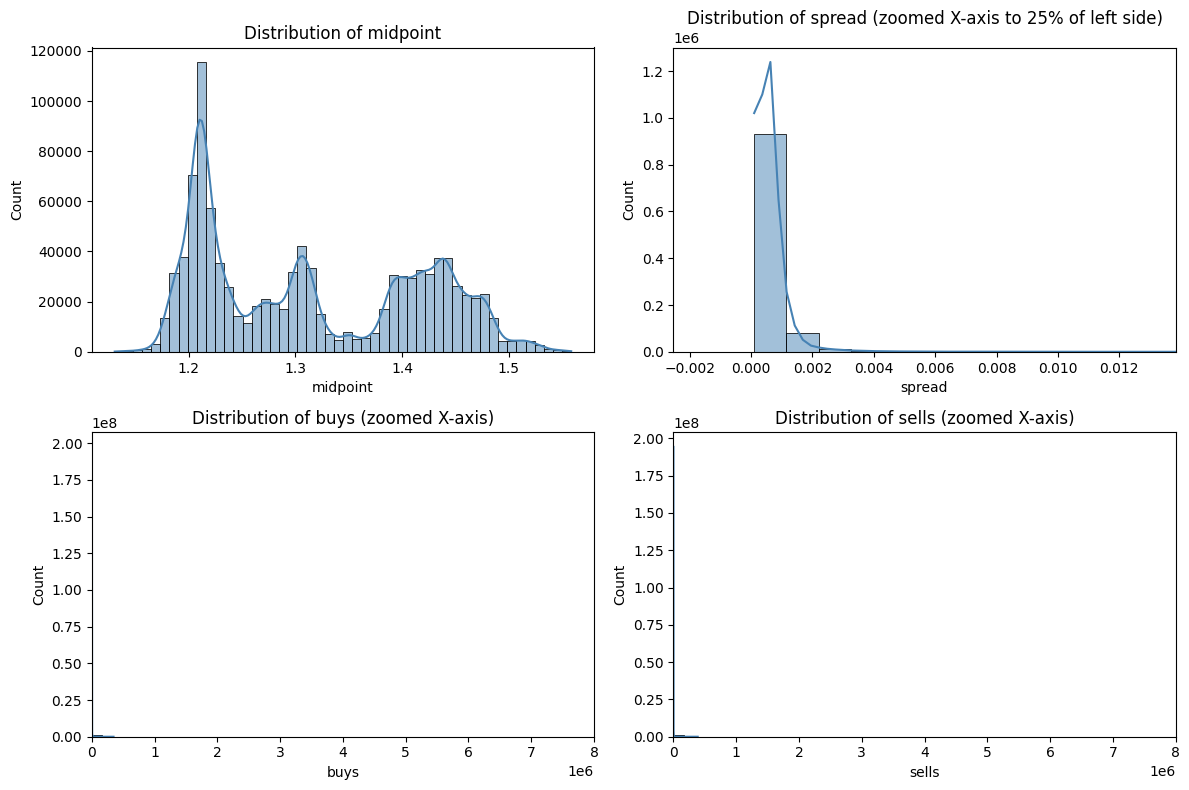

In [21]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=8*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

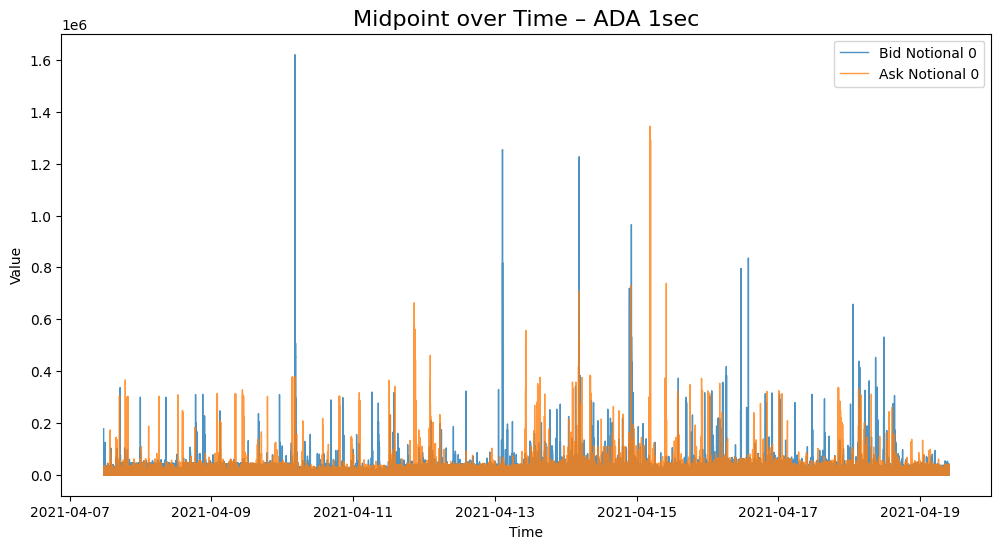

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – {} {}'.format(asset, freq), fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

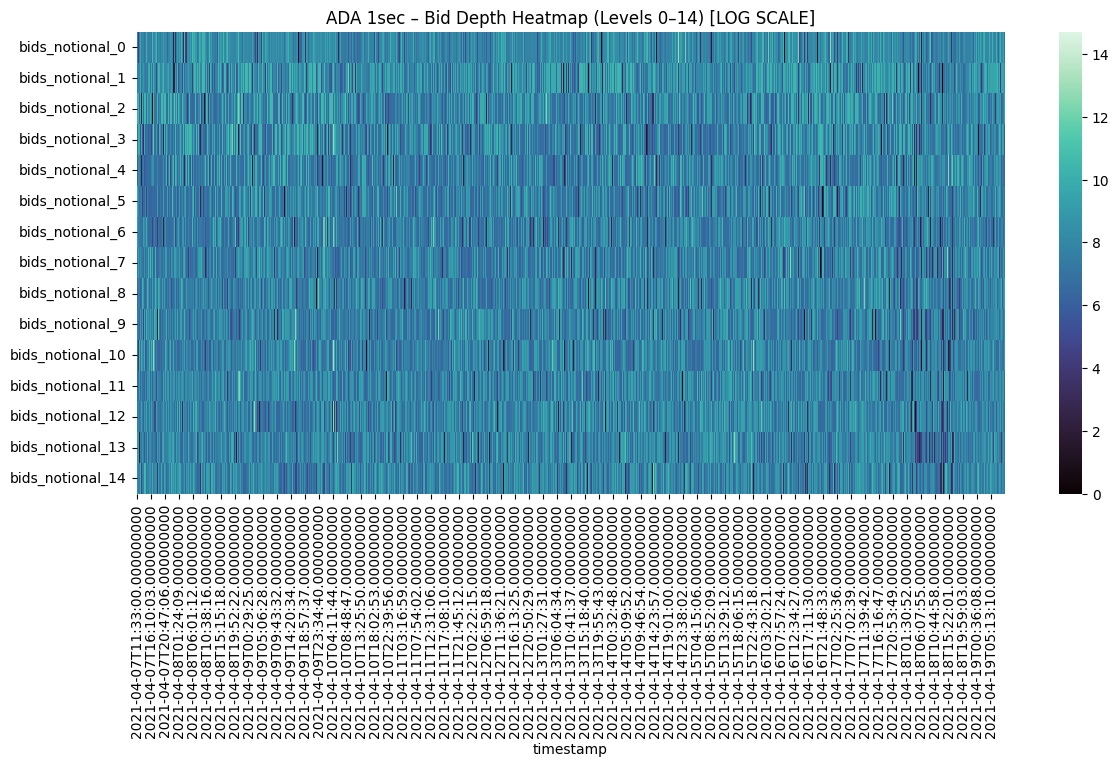

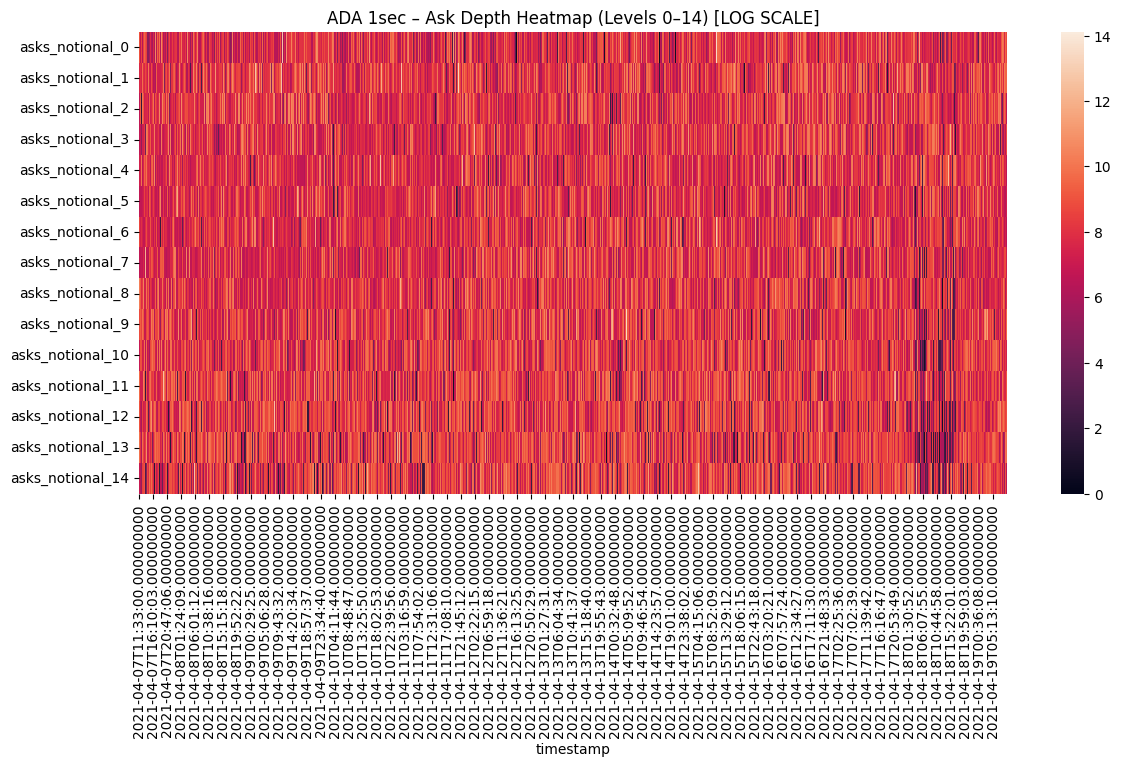

In [23]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

In [24]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)


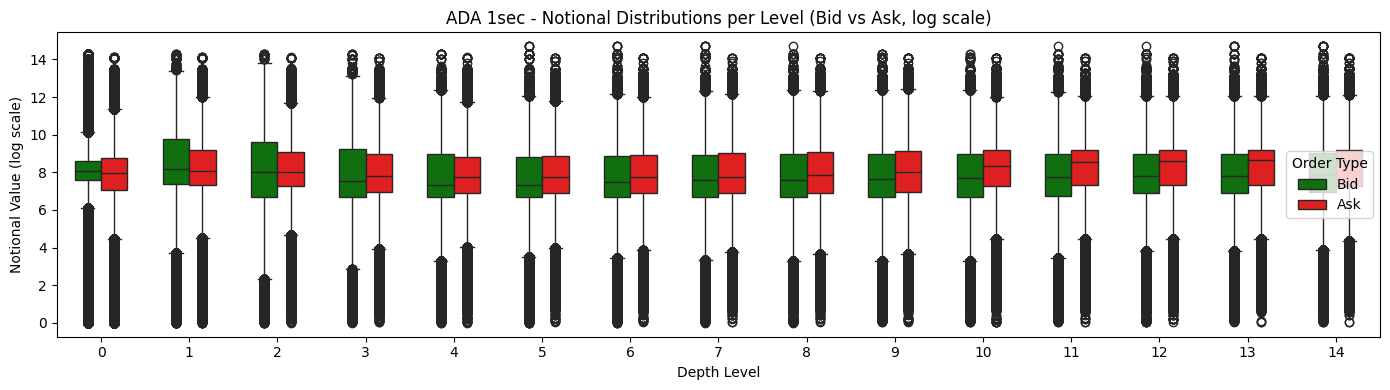

In [25]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

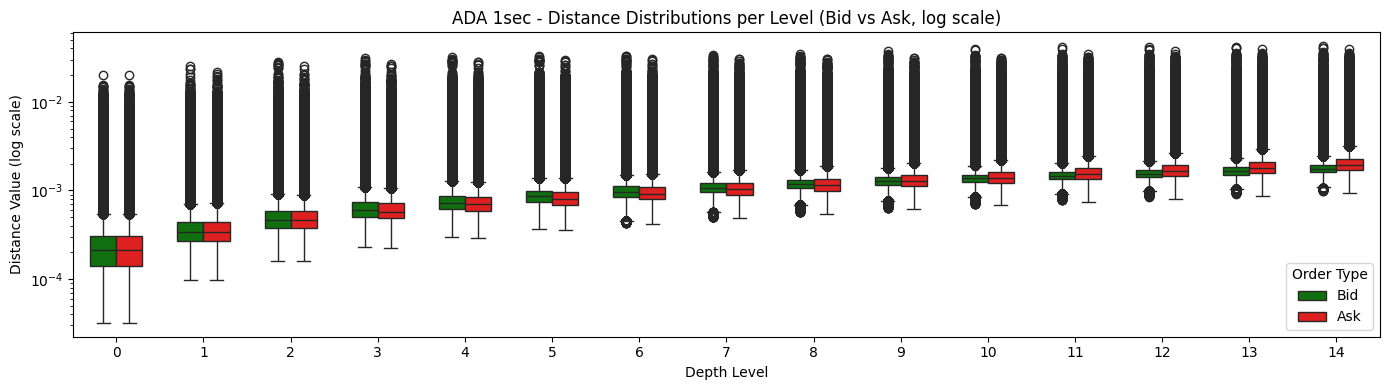

In [26]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

In [27]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

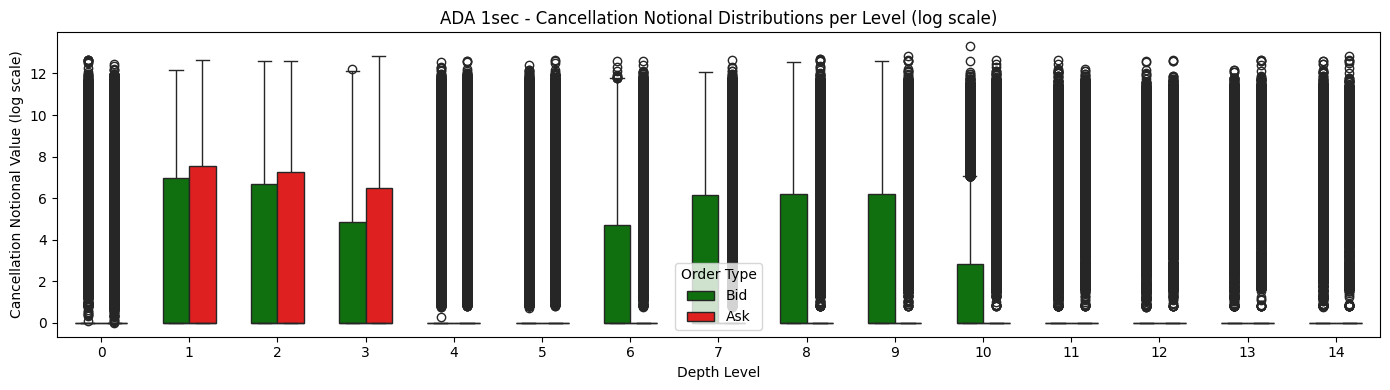

In [28]:
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, but for low levels the distribution exists.

### Limit Volume

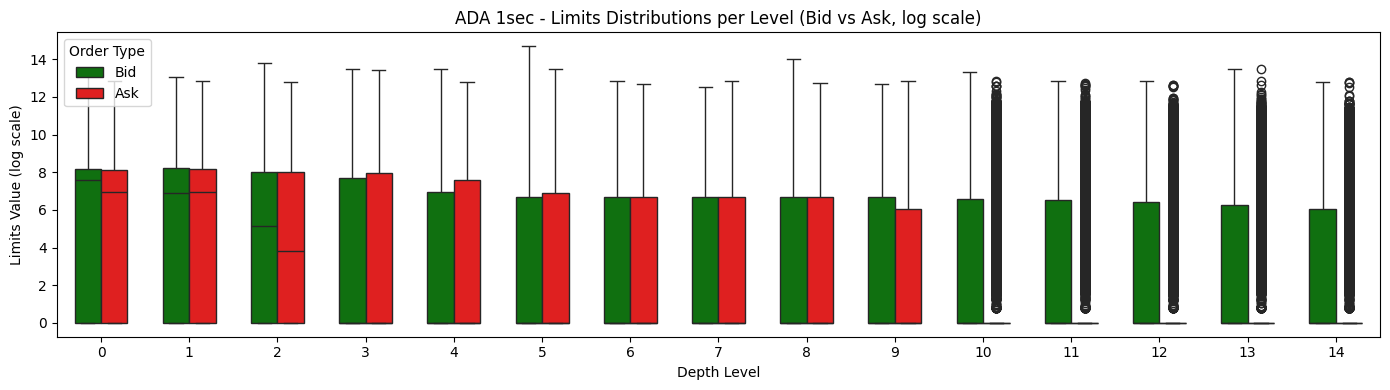

In [29]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

In [30]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

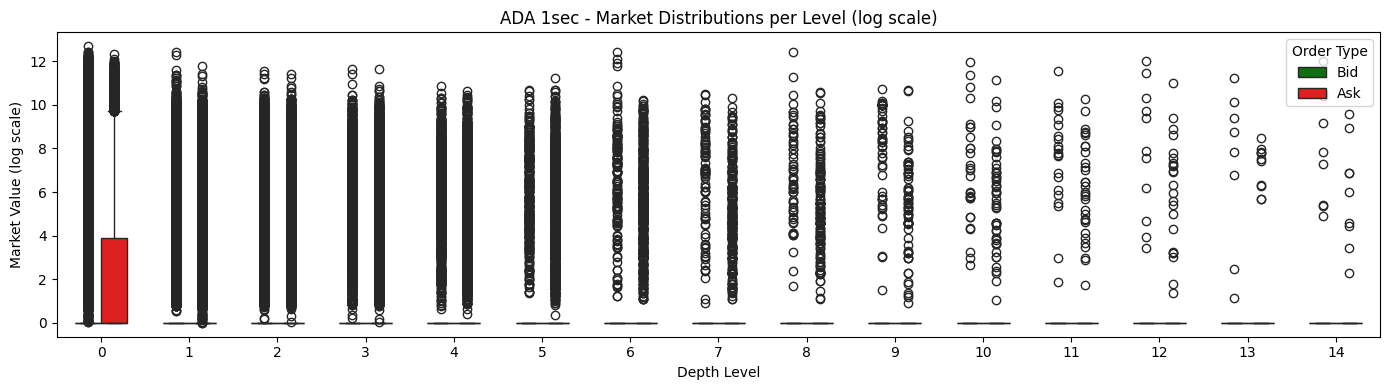

In [31]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

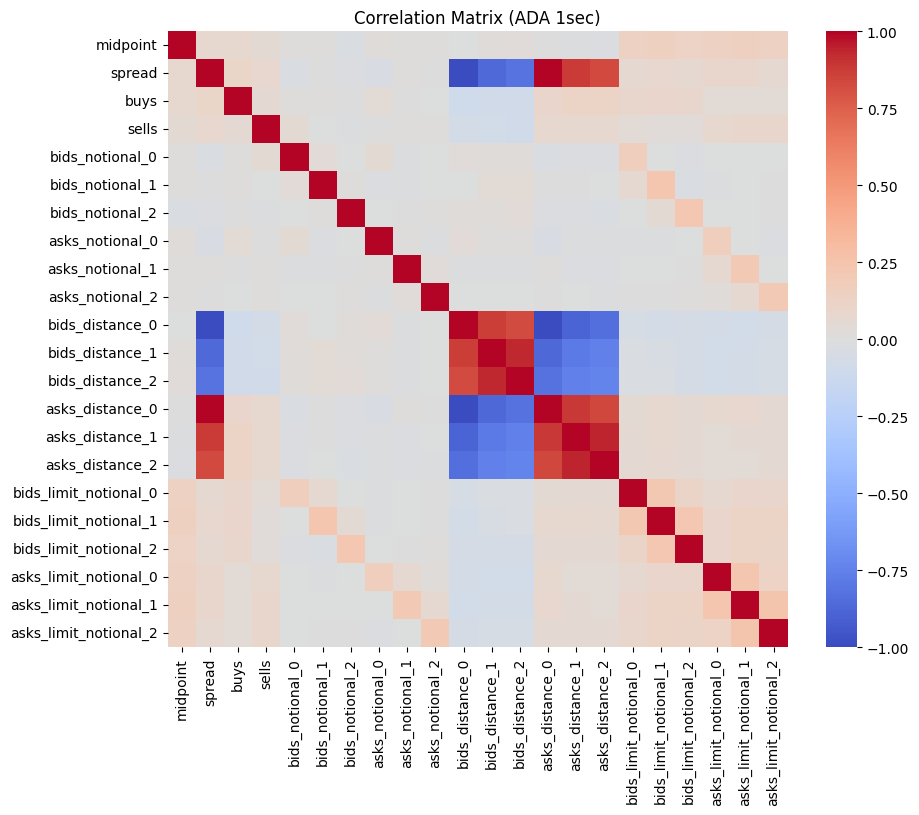

In [32]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.